TO EXPLORE BUSINESS ANALYTICS

Performing exploratory data analytics on the sample store dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path="/SampleSuperstore.csv"
data = pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#looking for any missing values
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# To get information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#looking for any duplicated values
data.duplicated().sum()

17

In [ ]:
#keeping only first values of the duplicated data-values and place a copy of our dataset
data.drop_duplicates(keep = "first",inplace = True)
data.duplicated().sum()

0

CORRELATION

In [ ]:
data_corr = data.corr()
data_corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


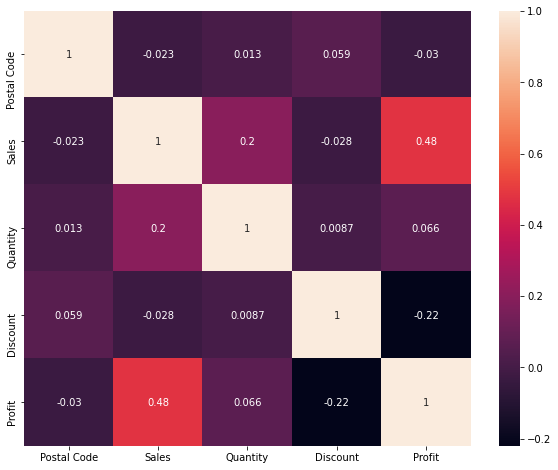

In [ ]:
#Annotate each cell with the numeric value 
plt.figure(figsize = (10, 8))
sns.heatmap(data_corr,annot=True)

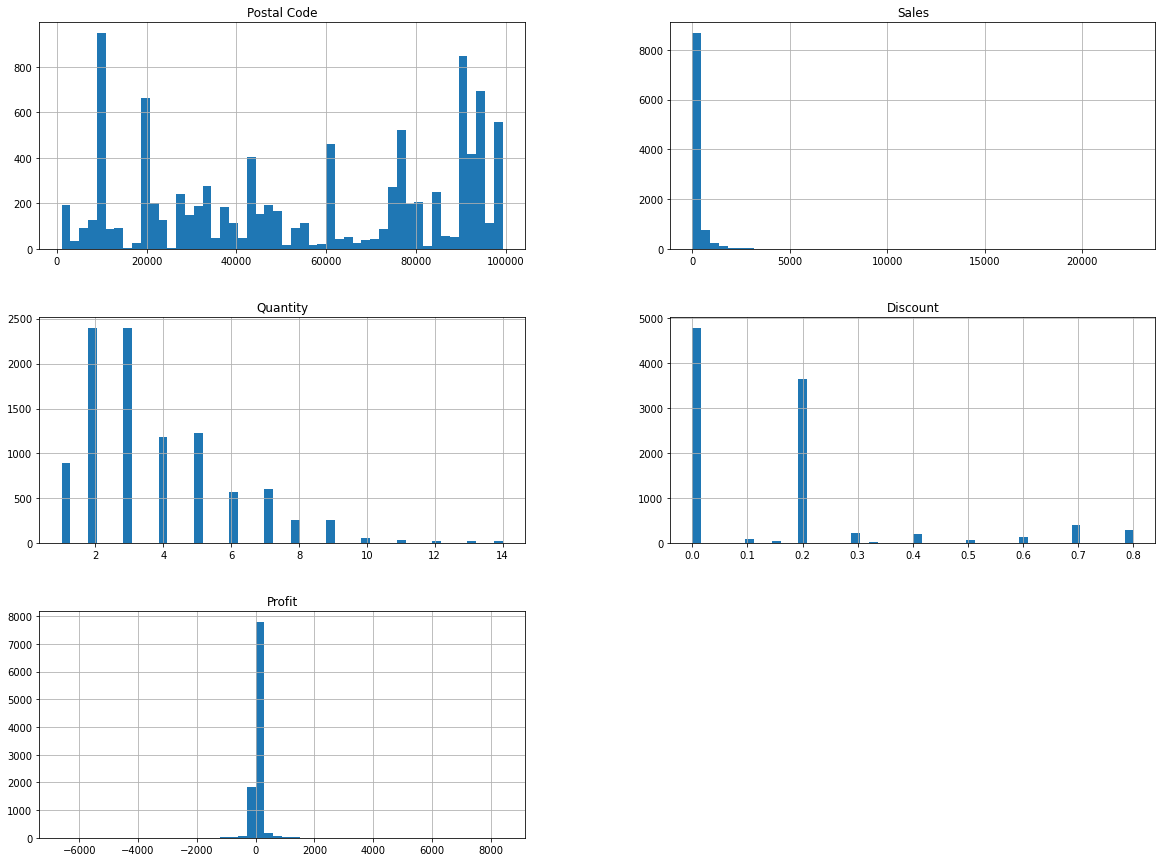

In [ ]:
# Distribution of our 5 Quantittative values :- Discount, Sales, Profit , Quantity , Postal Code
data.hist(bins=50 ,figsize=(20,15))
plt.show();

In [ ]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

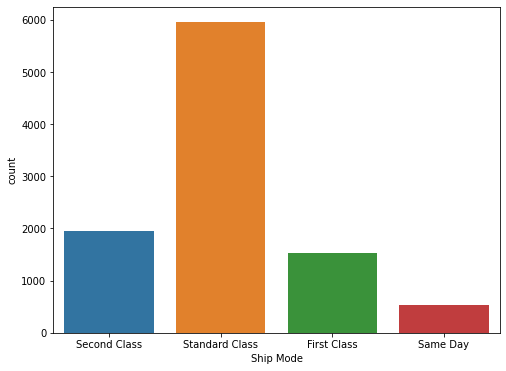

In [ ]:
# to mark the count of each ShipMode
plt.figure(figsize=(8,6))
sns.countplot(x="Ship Mode",data=data)
plt.show()

In [ ]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

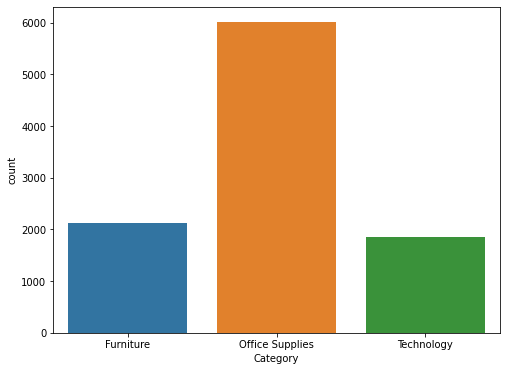

In [ ]:
#BarPlot to mark the count of each Category
plt.figure(figsize=(8,6))
sns.countplot(x="Category",data=data)
plt.show()

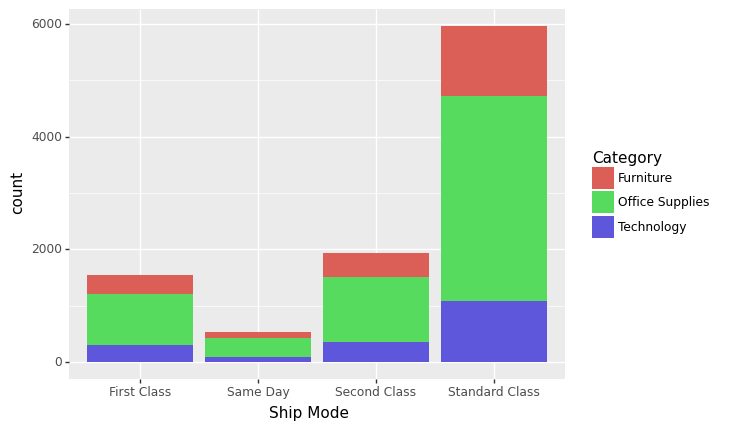

<ggplot: (8740898284734)>

In [ ]:
#to mark the count of our shipmode and mark the category in each of SHipMode category.
ggplot(data, aes(x='Ship Mode', fill = 'Category')) + \
    geom_bar(stat = 'count')

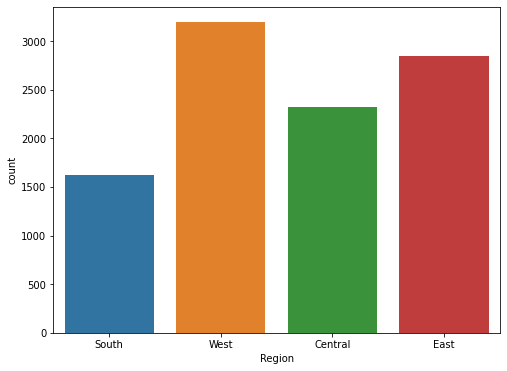

In [ ]:
#mark the count of each region
plt.figure(figsize=(8,6))
sns.countplot(x="Region",data=data)
plt.show()


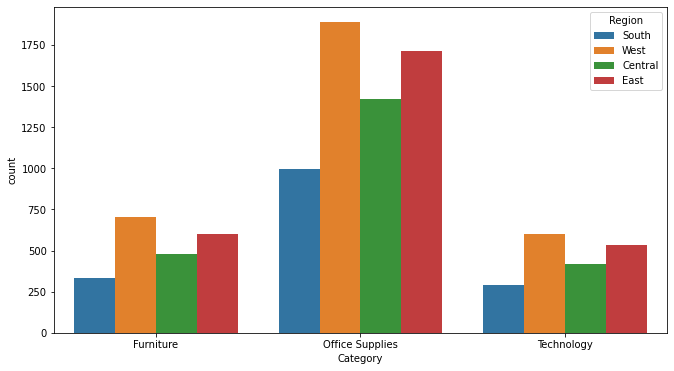

In [ ]:
#for evry region mark the plots for the count of each category in that region
plt.figure(figsize=(11,6))
sns.countplot(x="Category", hue="Region", data=data)
plt.show()

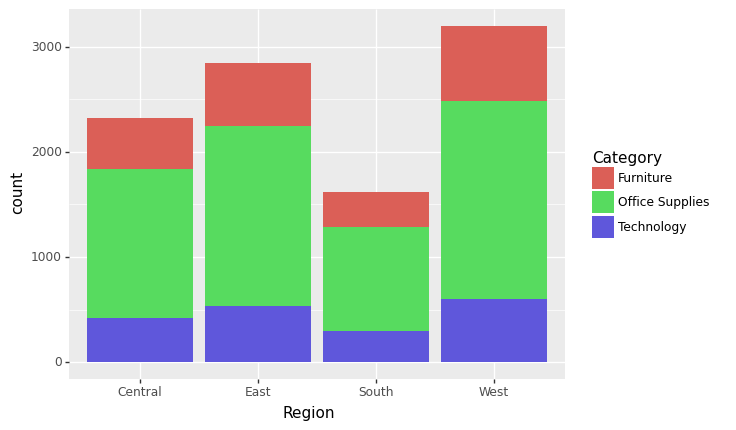

<ggplot: (8740893567401)>

In [ ]:
#to mark count of region and fill category in each region
ggplot(data, aes(x='Region', fill = 'Category')) + \
    geom_bar(stat = 'count')

In [ ]:
#count of each SubCategory
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

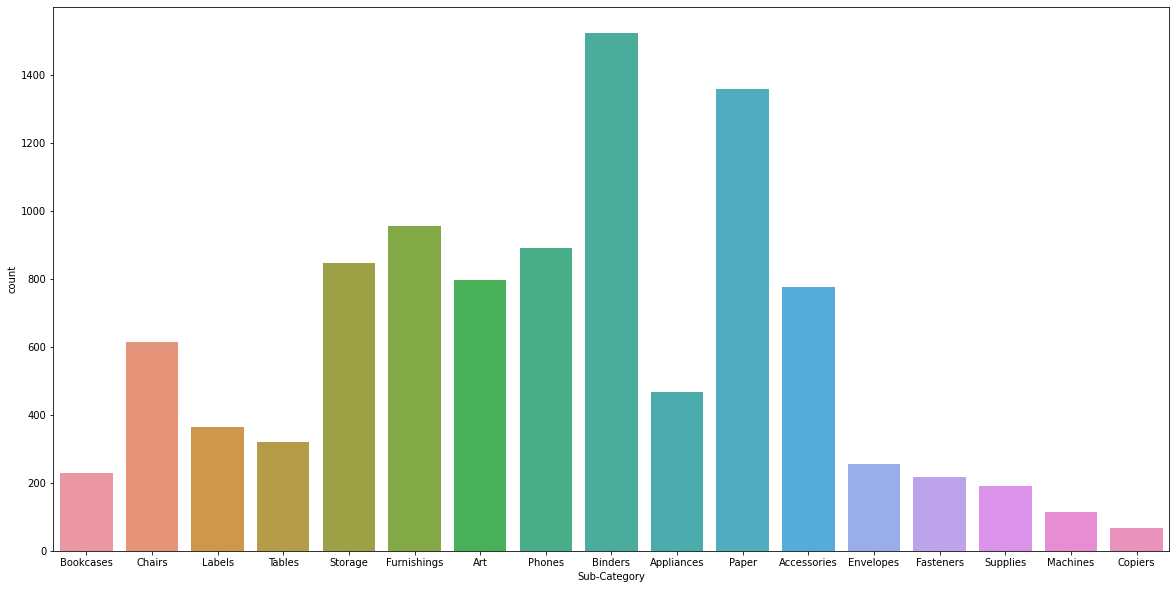

In [ ]:
# to mark the count of each SubCategory
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category",data=data)
plt.show()

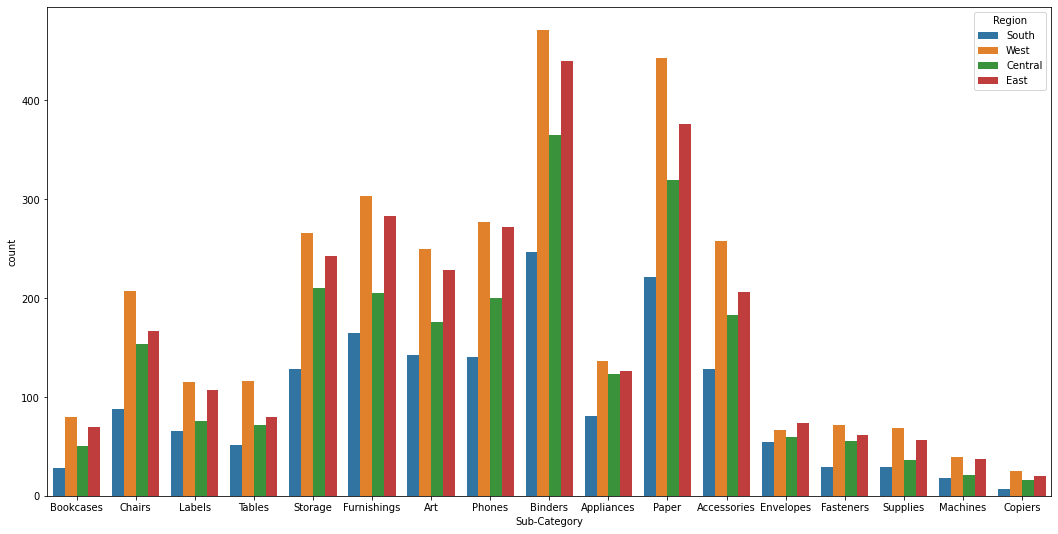

In [ ]:
#show subcategory count by every region
plt.figure(figsize=(18,9))
sns.countplot(x='Sub-Category',hue='Region',data=data)
plt.show()

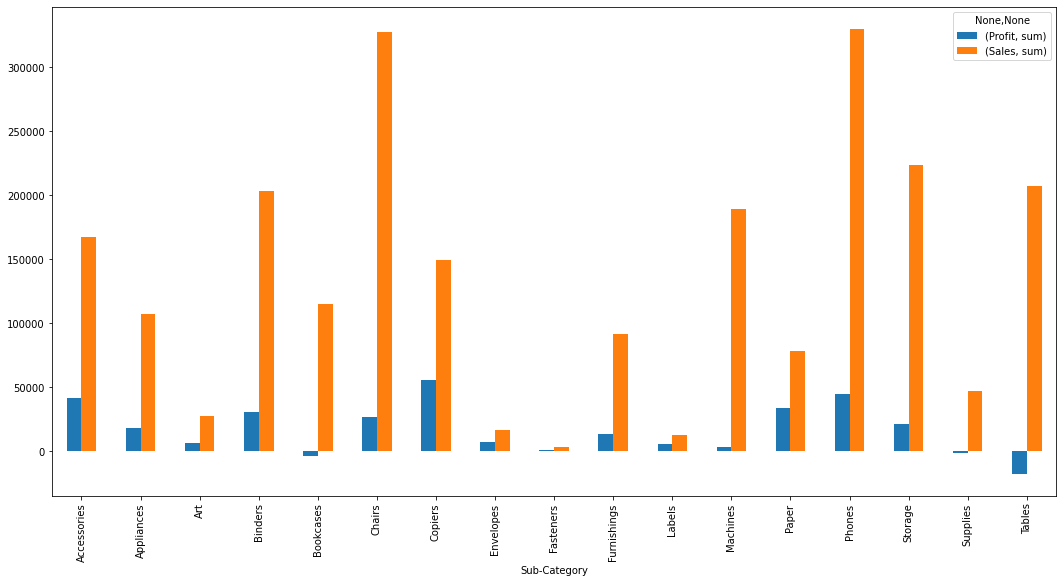

In [ ]:
#show double bar plot of subcategory with profit and sales
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(18,9))
plt.show()

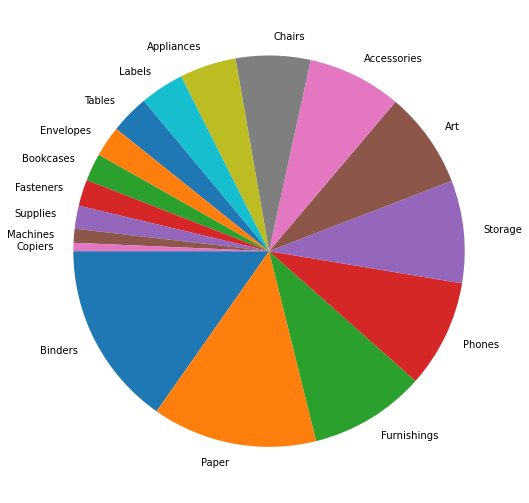

In [ ]:
#show pie chart of subcateory
plt.figure(figsize=(18,9))
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index, startangle=180, radius=1)
plt.show()

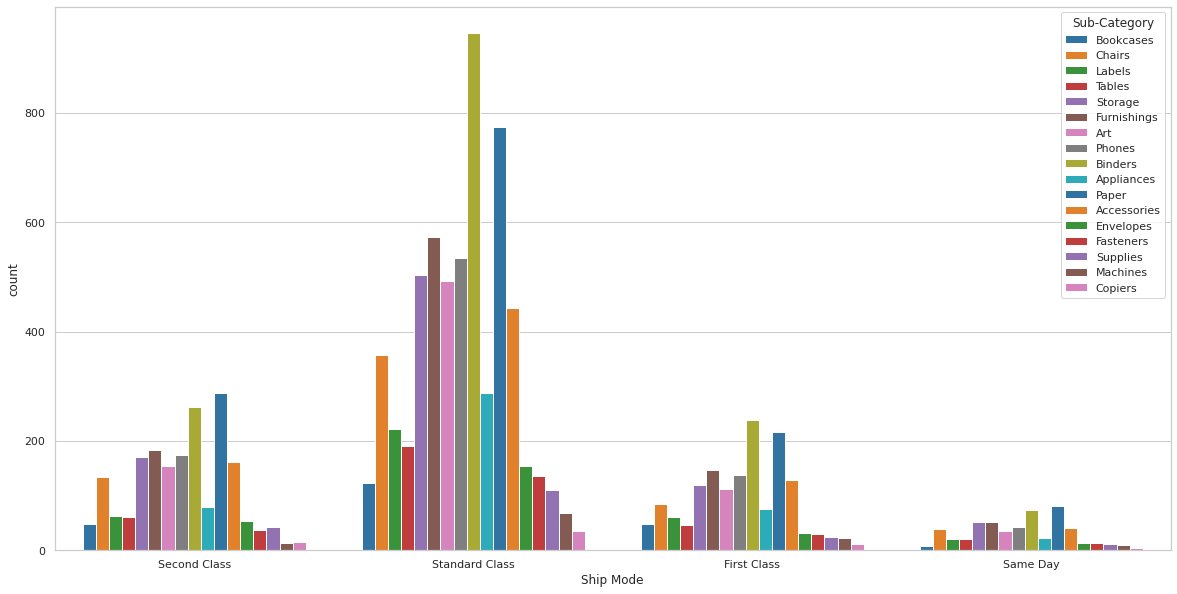

In [ ]:
# to mark the count of each Ship-Mode see the count of each Sub-Category of our Ship-Mode 
plt.figure(figsize=(20,10))
sns.set(style = 'whitegrid')
sns.countplot(x = 'Ship Mode',
              data = data,
             hue = 'Sub-Category',
             palette = 'tab10');

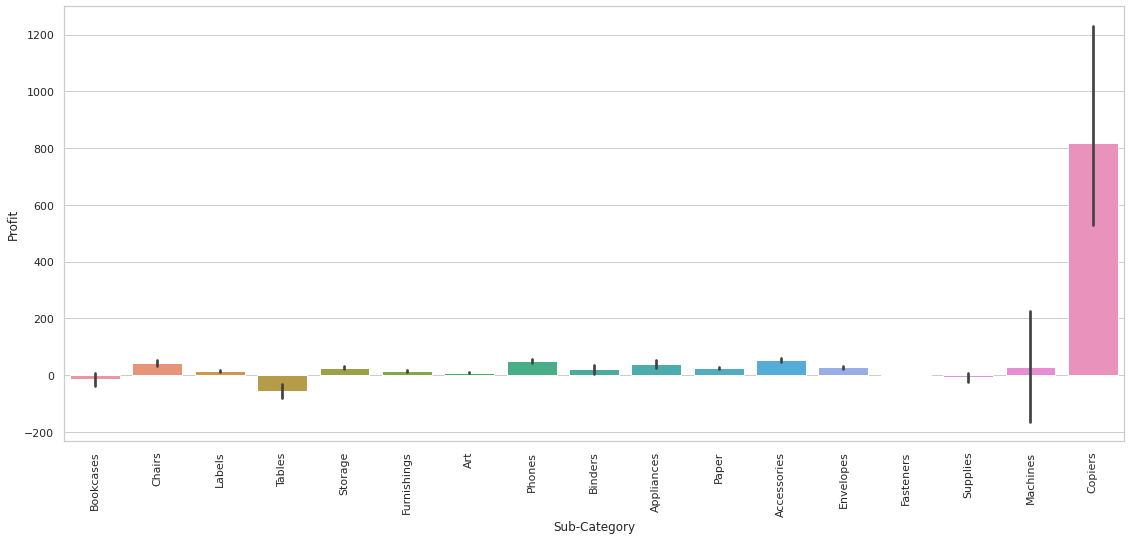

In [ ]:
#To mark the Profit Count for every Sub-Category
sns.set(style="whitegrid")
plt.figure(figsize=(19,8))
sns.barplot(x=data['Sub-Category'],y=data['Profit'])
plt.xticks(rotation=90)
plt.show()

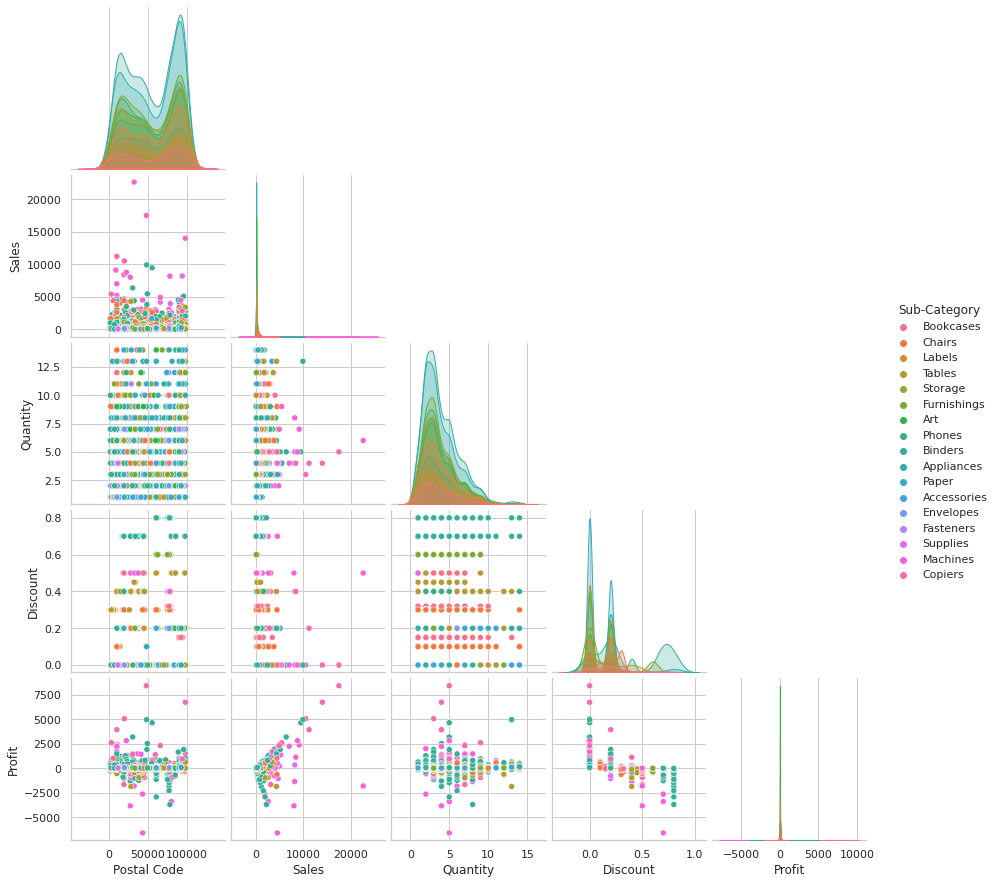

In [ ]:
#pairplot subcategory with all its correlations and mark only lower map.
sns.pairplot(data,hue='Sub-Category' , corner='True')

In [ ]:
#show Profit aggregate values of every state
data.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,1996,13.33380,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


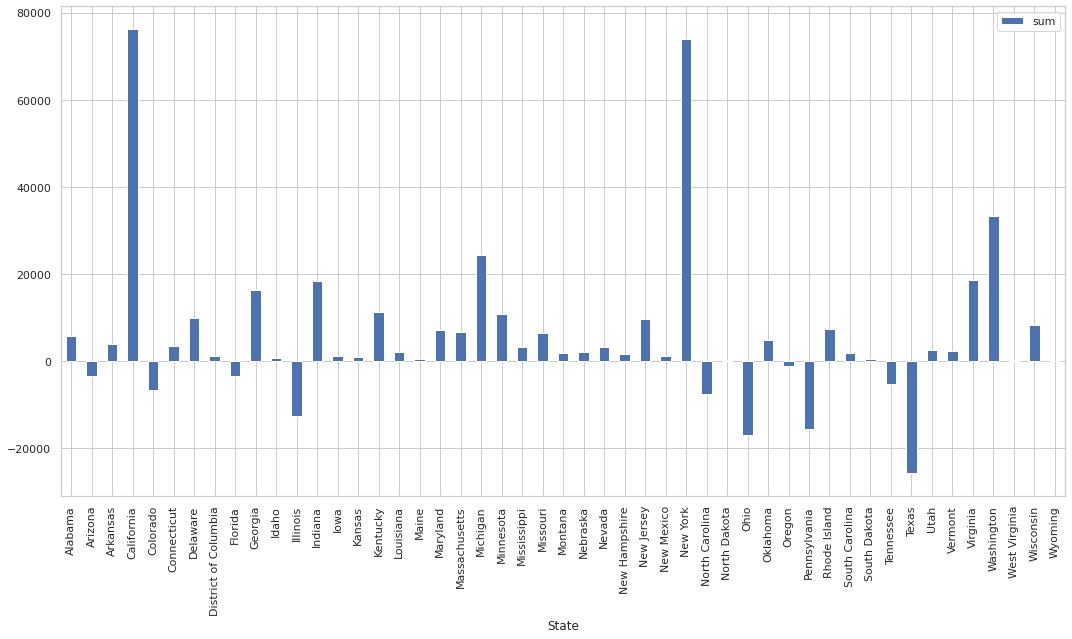

In [ ]:
#show state wise aggregate sum of profit
data.groupby('State')['Profit'].agg(['sum']).plot.bar(figsize=(18,9))
plt.show()

In [ ]:
data.groupby("Region").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
Region,,,,,,,,
Central,39655.8752,17.100421,-3701.8928,8399.9760,2319,5.1792,291.738112,85111.126127
East,91506.3092,32.163905,-6599.9780,5039.9856,2845,8.1882,251.735832,63370.929091
South,46749.4303,28.857673,-3839.9904,3177.4750,1620,9.0720,212.893088,45323.466948
West,108329.8079,33.927281,-3399.9800,6719.9808,3193,11.1776,174.375763,30406.906832


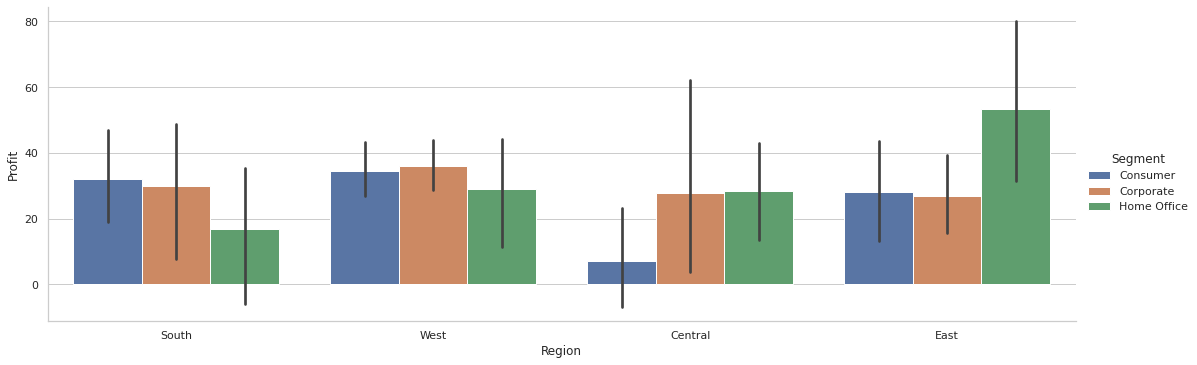

In [ ]:
#to get the profits in each Regiion by every Segments
sns.catplot(
    data=data,
    x='Region',
    y='Profit',
    hue='Segment',
    kind='bar',
    height=5, # make the plot 5 units high
    aspect=3)

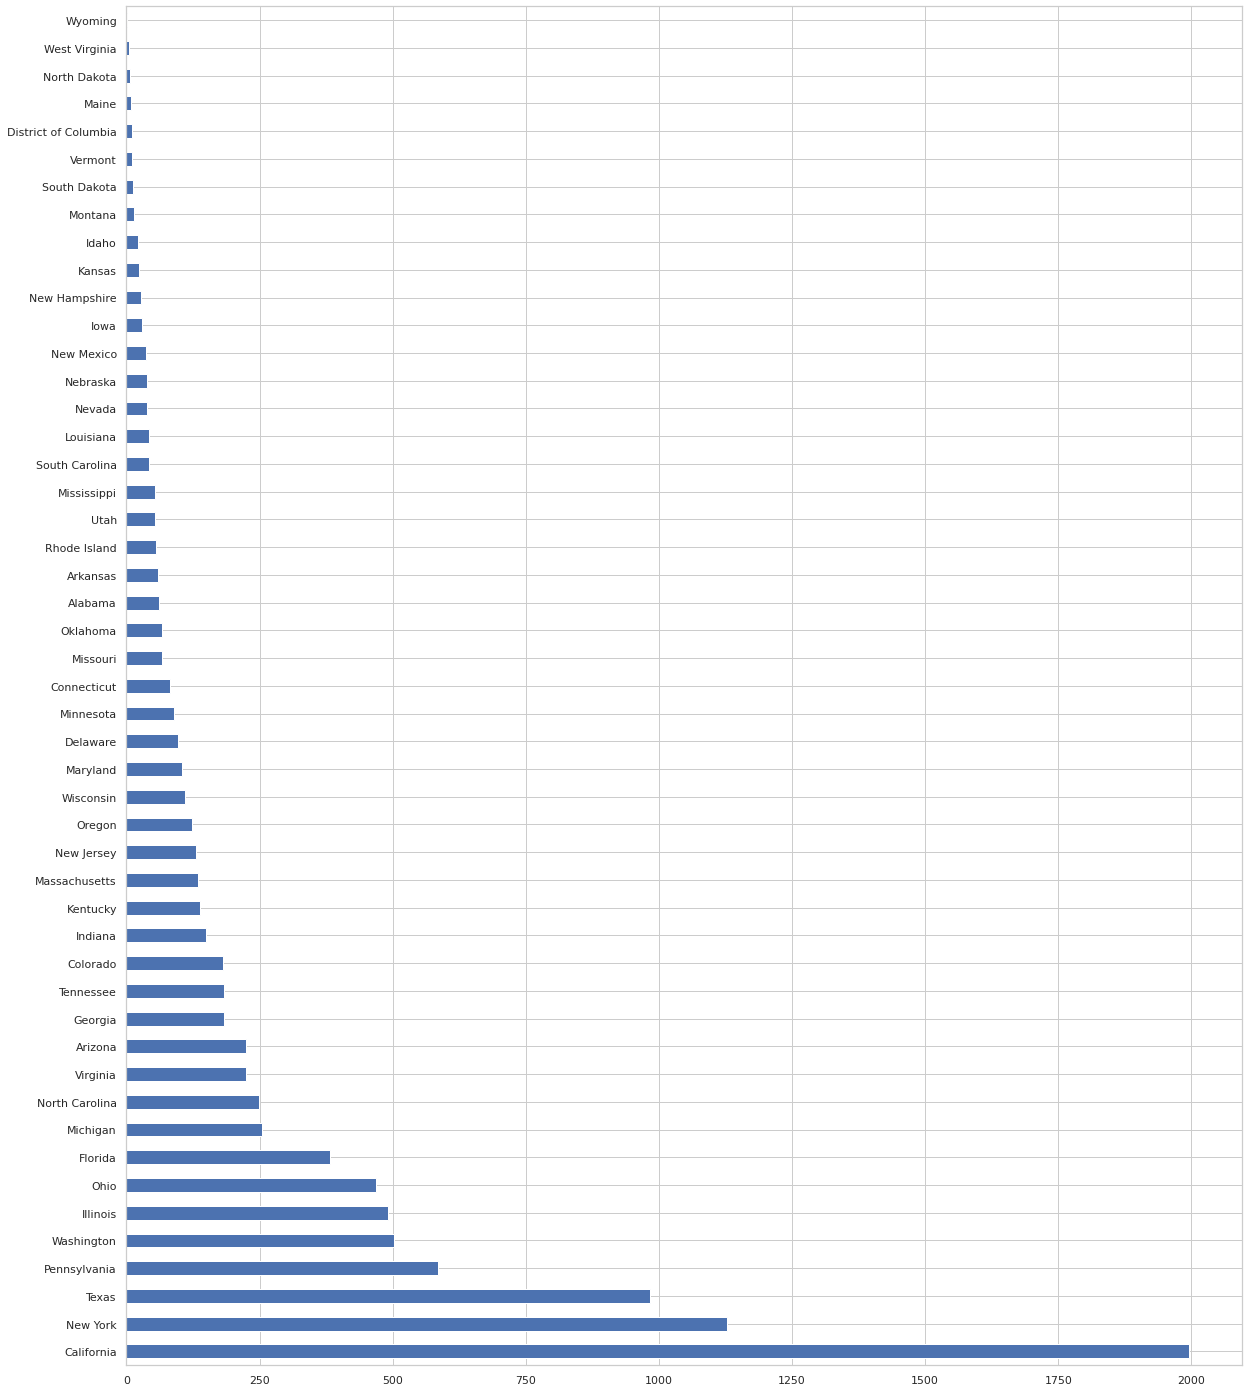

In [ ]:
#horiontal barplot of the count of state
data['State'].value_counts().plot(kind='barh', figsize=(20,25))

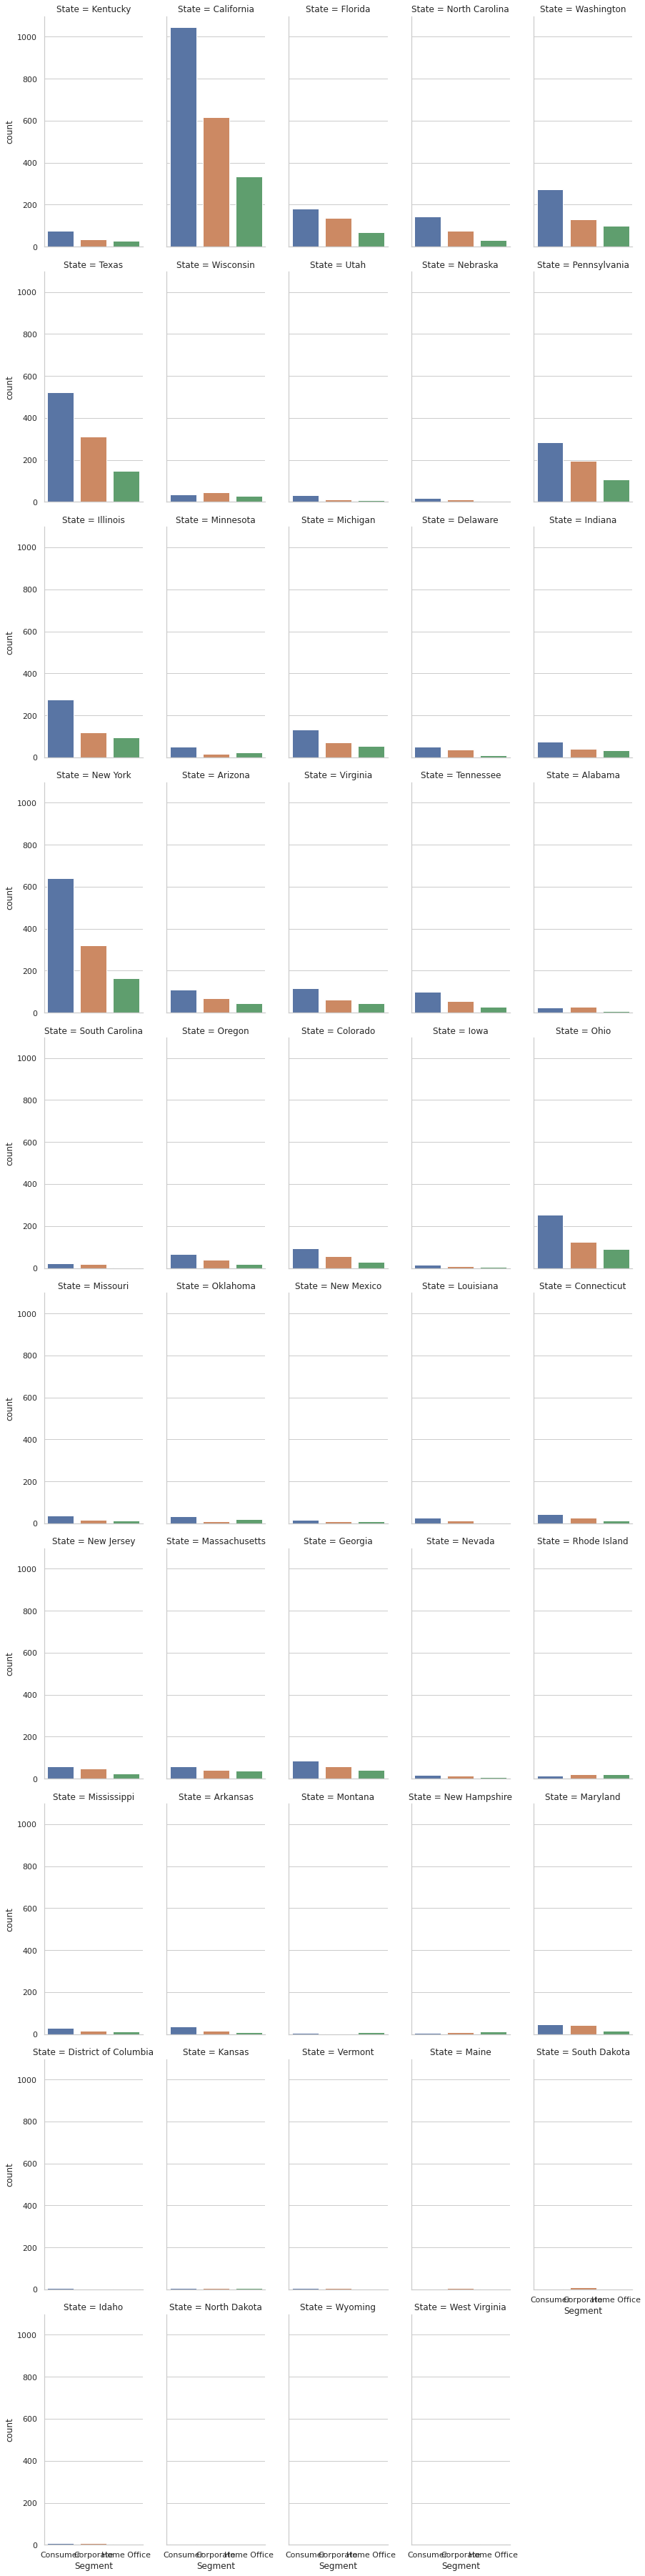

In [ ]:
#Get the count of each Segment in every State
g = sns.catplot(x="Segment", col="State", col_wrap=5,
                data=data,
                kind="count", height=5, aspect=.5)

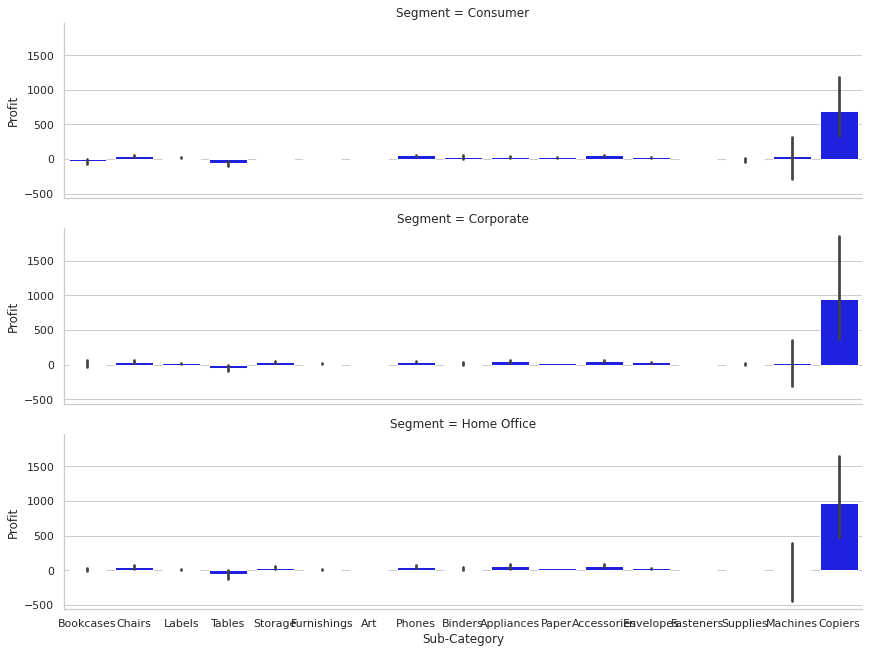

In [ ]:
#Segment wise profits in each subcategory
sns.catplot(
    data=data,
    x='Sub-Category',
    y='Profit',
    row='Segment',
    kind='bar',
    height=3, 
    aspect=4,
    color='blue')

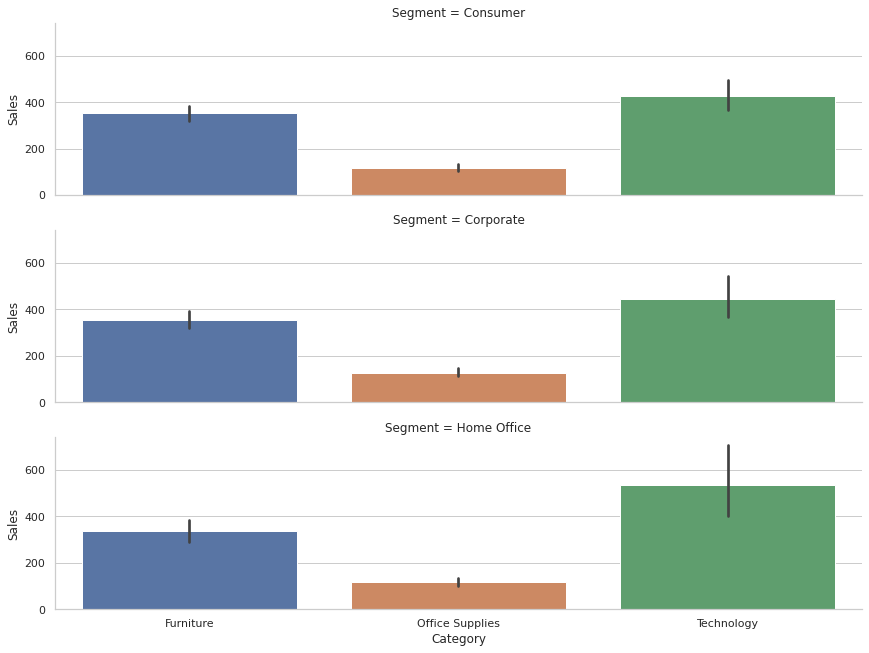

In [ ]:
#Segment wise profits in each Category
sns.catplot(
    data=data,
    x='Category',
    y='Sales',
    row='Segment',
    kind='bar',
    height=3, 
    aspect=4)

In [ ]:
dt_top_10_cities = data.groupby("City")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_cities.head(10)

,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [ ]:
dt_top_10_cities = data.groupby("City")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_cities.head(10)

,City,Discount
374,Philadelphia,175.30
207,Houston,142.74
80,Chicago,119.70
109,Dallas,56.30
266,Los Angeles,55.50
329,New York City,51.40
94,Columbus,38.20
216,Jacksonville,35.85
438,San Francisco,34.00
452,Seattle,27.80


In [ ]:
dt_top_10_sub_categories = data.groupby("Sub-Category")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003
5,Chairs,26567.1278
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13052.7230
7,Envelopes,6964.1767


In [ ]:
dt_top_10_sub_categories = data.groupby("Sub-Category")["Discount"].sum().reset_index().sort_values(by="Discount",ascending=False)
dt_top_10_sub_categories.head(10)

,Sub-Category,Discount
3,Binders,566.20
13,Phones,137.40
9,Furnishings,132.40
5,Chairs,104.70
12,Paper,101.80
16,Tables,83.35
1,Appliances,77.60
14,Storage,63.20
0,Accessories,60.80
2,Art,59.60


In [ ]:
dt_top_10_region = data.groupby("Region")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
dt_top_10_region.head(2)

,Region,Sales
3,West,725255.6365
1,East,678435.1960
